# import necessary libraries

In [5]:
import pandas as pd
import os

In [13]:
#merging all files
files=[ file for file in os.listdir("./Sales_Data")]
       
all_month_data=pd.DataFrame()
       
for file in files:
       df=pd.read_csv("./Sales_Data/"+file)
       all_month_data=pd.concat([all_month_data,df])
       
all_month_data.head()
all_month_data.to_csv("all_data.csv", index = 0)     

In [16]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_data=pd.read_csv("all_data.csv")
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### cleanup dats

In [24]:
#finding missing values
missing_values = all_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64


In [23]:
#removing missing values
all_data = all_data.dropna()


In [27]:
#finding duplicate values
duplicates = all_data[all_data.duplicated()]
print("\nDuplicate rows:")
print(duplicates)


Duplicate rows:
Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, month]
Index: []


In [26]:
#removing duplicate values
all_data = all_data.drop_duplicates()


In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


In [30]:
print("\nDataFrame after attempting to convert 'Order Date' to datetime:")
print(all_data)


DataFrame after attempting to convert 'Order Date' to datetime:
       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

                Order Date        

In [31]:
invalid_dates = all_data[all_data['Order Date'].isna()]
print("\nRows with invalid 'Order Date':")
print(invalid_dates)


Rows with invalid 'Order Date':
     Order ID  Product  Quantity Ordered  Price Each Order Date  \
519  Order ID  Product  Quantity Ordered  Price Each        NaT   

     Purchase Address month  
519  Purchase Address    Or  


In [32]:
all_data = all_data.dropna(subset=['Order Date'])
print("\nDataFrame after dropping rows with invalid 'Order Date':")
print(all_data)


DataFrame after dropping rows with invalid 'Order Date':
       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

                Order Date               

### task_2= add month column


In [34]:
print("\nData types after conversion:")
print(all_data.dtypes)


Data types after conversion:
Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
month                       object
dtype: object


In [35]:
print(all_data[all_data['Order Date'].isna()])


Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, month]
Index: []


In [36]:
# Extract the month from 'Order Date'
all_data['Order Month'] = all_data['Order Date'].dt.month

# Display the DataFrame with the new 'Order Month' column
print("\nDataFrame with 'Order Month' column:")
print(all_data)


DataFrame with 'Order Month' column:
       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

                Order Date                         Purchase A

In [37]:
all_data = all_data.drop(columns=['month'])
print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

                Order Date                         Purchase Address  \
0      2019-04-19 08:46:00  

### add a sales column

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [43]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [44]:
all_data["sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### what was the best month for sales?How much was earned that month?

In [65]:
result=all_data.groupby("Order Month").sum()
print(result)

             Quantity Ordered  Price Each       sales
Order Month                                          
1                       10893  1810924.81  1821413.16
2                       13431  2186940.38  2200078.08
3                       16979  2789084.64  2804973.35
4                       20536  3366218.76  3389217.98
5                       18653  3133134.61  3150616.23
6                       15234  2560503.50  2576280.15
7                       16054  2631225.12  2646461.32
8                       13429  2226963.90  2241083.37
9                       13091  2081897.65  2094465.69
10                      22669  3713608.80  3734777.86
11                      19769  3178872.53  3197875.05
12                      28074  4583267.77  4608295.70


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\1657849794.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=all_data.groupby("Order Month").sum()


In [49]:
import matplotlib.pyplot as plt

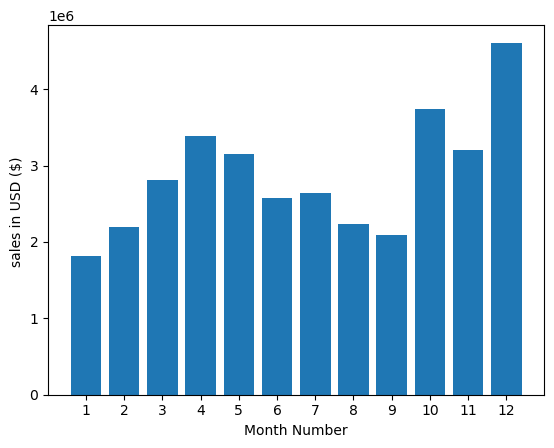

In [54]:
months=range(1,13)
plt.bar(months, result["sales"])
plt.xticks(months)
plt.ylabel("sales in USD ($) ")
plt.xlabel("Month Number")
plt.show()

### WHAT CITY HAD THE HIGEST NUMBER OF SALES

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [56]:
# make a new column for city
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [62]:
result_city=all_data.groupby("City").sum()
print(result_city)

               Quantity Ordered  Price Each  Order Month       sales
City                                                                
Atlanta                   16584  2778608.69       104649  2794199.07
Austin                    11137  1808340.03        69720  1818044.33
Boston                    22494  3634398.40       140898  3658627.65
Dallas                    16707  2750026.38       104447  2765373.96
Los Angeles               33247  5417171.70       208020  5448304.28
New York City             27903  4632920.54       175557  4661867.14
Portland                  14037  2306588.80        87636  2319331.94
San Francisco             50169  8204001.38       314949  8254743.55
Seattle                   16534  2730586.55       104817  2745046.02


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\1225905394.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_city=all_data.groupby("City").sum()


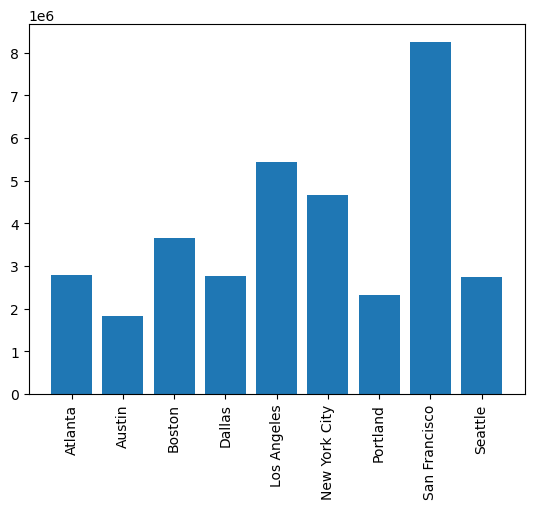

In [100]:

City=[city for city, df in all_data.groupby("City")]
plt.bar(City, result_city["sales"])
plt.xticks(City, rotation="vertical")
plt.show()

### what time should we display advertisement to maximize likelihood of customer's buying product ?

In [83]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [93]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour

# Display the DataFrame with the new 'Order Hour' column
print("\nDataFrame with 'Order Hour' column:")
all_data.head()


DataFrame with 'Order Hour' column:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,Order Hour,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,9


In [95]:
all_data = all_data.drop(columns=['Order Hour'])
result_hour=all_data.groupby("Hour").sum()
print(result_hour)

      Quantity Ordered  Price Each  Order Month       sales
Hour                                                       
0                 4420   709124.09        27477   713548.66
1                 2616   458187.02        16643   460563.90
2                 1397   233821.65         8502   234839.45
3                  927   144711.47         5903   145742.94
4                  935   161943.24         6135   162546.07
5                 1492   229606.26         9298   230664.87
6                 2809   444850.12        17528   447963.01
7                 4547   739781.31        28787   744067.32
8                 6998  1185930.85        43605  1192309.20
9                 9808  1628251.95        60930  1638784.04
10               12292  1931369.92        76781  1942988.08
11               13986  2284864.78        87522  2296619.84
12               14188  2297415.19        89058  2314359.85
13               13671  2136724.04        85699  2152369.98
14               12343  2071035.74      

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\1953871300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_hour=all_data.groupby("Hour").sum()


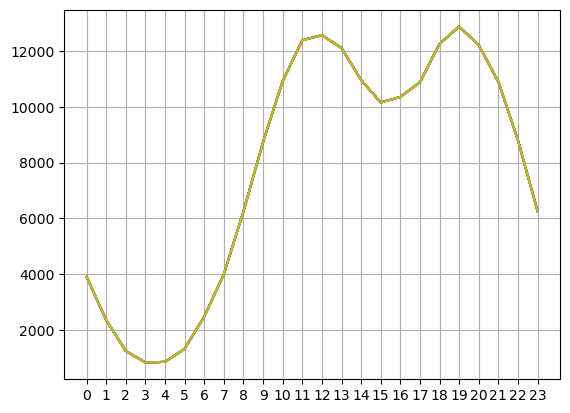

In [102]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.show()

### what product are most often sold together

In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [107]:
df = all_data[all_data["Order ID"].duplicated(keep=0)]
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = df.drop_duplicates(subset=['Order ID', 'Grouped'])
df.head(10) 

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\2926505961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,10,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,Bose SoundSport Headphones,1,99.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,99.99,New York City,17,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,34in Ultrawide Monitor,1,379.99,2019-04-05 17:38:00,"730 6th St, Austin, TX 73301",4,379.99,Austin,17,"34in Ultrawide Monitor,Google Phone"
225,176774,Lightning Charging Cable,1,14.95,2019-04-25 15:06:00,"372 Church St, Los Angeles, CA 90001",4,14.95,Los Angeles,15,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,iPhone,1,700.00,2019-04-03 07:37:00,"976 Hickory St, Dallas, TX 75001",4,700.00,Dallas,7,"iPhone,Lightning Charging Cable"
250,176797,Google Phone,1,600.00,2019-04-21 08:54:00,"923 Elm St, Los Angeles, CA 90001",4,600.00,Los Angeles,8,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [110]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### what product sold the most ? why do you think it sold the most ?

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\3018579388.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


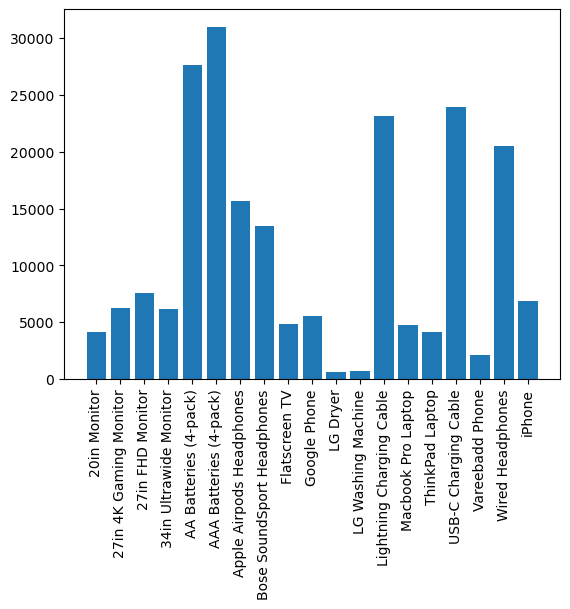

In [112]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered )
plt.xticks(products, rotation="vertical")
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\543080371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = all_data.groupby('Product').mean()['Price Each']
C:\Users\LEGION\AppData\Local\Temp\ipykernel_11008\543080371.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


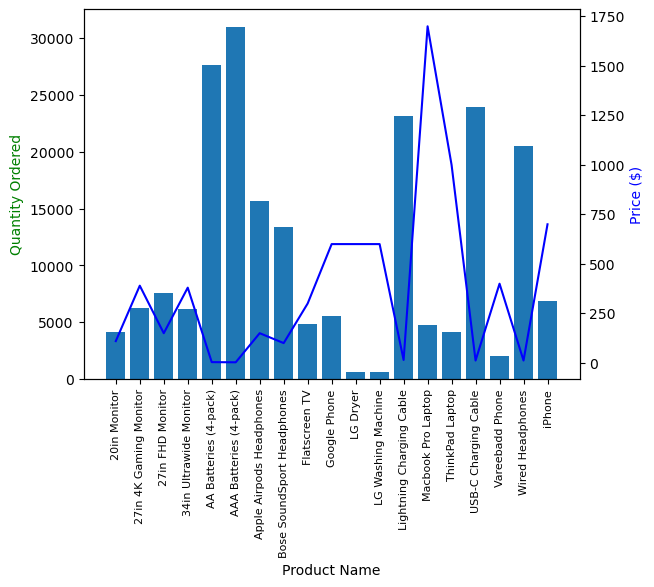

In [116]:

price = all_data.groupby('Product').mean()['Price Each']

fig, ax1= plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered )
ax2.plot(products, price, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()